<a href="https://colab.research.google.com/github/Luis-Eugenio/DSW-LuisEugenio/blob/main/SumaRiemannDerecha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Nacional Abierta y a Distancia

Curso: Métodos Numéricos

Luis Alberto Eugenio Medina



#Ejercicio 1: Fundamentos de Programación#


Desarrolle un código Python en la herramienta Google Colab que 
calcule las siguientes Sumas de Riemann por la derecha. 

La función a la cual se le debe aproximar el área bajo la curva es: 

$$f\left(x\right)=e^{\left(\frac x2\right)}+1$$

En el intervalo [0,3]. Y las aproximaciones que se deben generar están 
determinadas por las particiones de la siguiente tabla con su 
respectivo error porcentual.

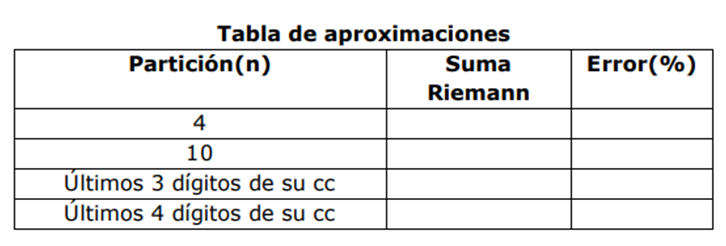


Posteriormente, adjunte cuatro gráficas realizadas en Geogebra de las 
4 aproximaciones realizadas en la tabla con su respectivo análisis.
 


**Importación de librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

##Integral definida solucion exacta##

$A=\int_0^3(e^{\textstyle\frac x2}+1)dx$

$A=\int\;e\;x\;2\;d\;x\;+\;\int\;1\;d\;x$

$ A=\;2\;\int\;e\;u\;d\;u$

$ A= 2\;\int\;e\;u\;d\;u=\;2\;e\;u=\;2\;e\;x\;2$

$ A=\;2\;e\;x\;2\;+\;x$

$A=2\;e\;x\;2\;+\;x\;+\;C$

$A=2\;e^\frac32+1$




In [ ]:
Aexacta= 2*(2.718)**(1.5)+1
Aexacta

9.961984207082715


##Funcion F(X)##

In [ ]:
def f(x):
  y =  ((np.euler_gamma)**(x/2))+1  #Funcion del problema, la cual se va integrar numericamente
  return (y)

**Función error**


$$Error(\%) = \dfrac{|Valor exacto - Valor Aproximado|}{Valor exacto} 100 (\%) $$

## Funcion Suma de Rieman Derecha ## 

In [ ]:
def RiemannDer(f, xi, xf, n):
  x = np.linspace(xi, xf, n)            #Valores de 'x' en los 'n' intervalos
  A = 0                                 #Aproximacion del area bajo la curva. Inicia en cero
  a = []                                #Vector que guarda el area del rectangulo en cada Subintervalo
  f1 = []                               #Valor de la funcion a la izquierda de cada subintervalo
  f2 = []                               #Valor de la funcion a la derecha de cada subintervalo
  xbar = []                             #Coordenadas en 'x' de las esquinas de cada barra del grafico de barras
  ybar = []                             #Coordenadas en 'y' de las esquinas de cada barra del grafico de barras

  for i in range (1, n):
    #Suma de Riemman
    f1.append(f(x[i-1]))                #Evalua la funcion a la izquierda de cada subintervalo y lo agrega al vector 'f1'
    f2.append(f(x[i]))                  #Evalua la funcion a la derecha de cada subintervalo y lo agrega al vector 'f1'
    fx = f(x[i])                        #Escoge 'f(x)' a la derecha del subintervalo
    deltax = x[i] - x[i-1]              #Ancho del subintervalo o rectangulo. En este caso es constante.
    a.append(fx*deltax)                 #Area del rectangulo del subintervalo y lo agrega el vector 'a'
    A += fx*deltax                      #Suma acumulada del area de los rectangulos para obtener el area bajo la curva aproximada

    #Datos Grafico de Barras:
    #1) Esquina inferior izquierda
    xbar.append(x[i-1])
    ybar.append(0)
    #2) Esquina superior izquierda
    xbar.append(x[i-1])
    ybar.append(fx)
    #3) Esquina superior derecha
    xbar.append(x[i])
    ybar.append(fx)
    #4) Esquina inferior derecha
    xbar.append(x[i])    
    ybar.append(0)

  return(A, xbar, ybar)

**Intervalo**

In [ ]:
xi = 0
xf = 3

**Suma de Riemann Derecha $n = 4$**

In [ ]:
n1 = 4
A1, xbar, ybar = RiemannDer(f, xi, xf, n1)
e1 = ((Aexacta - A1)/(Aexacta))*100

x = np.linspace(xi, xf, 4)


**Suma de Riemann Derecha $n = 10$**

In [ ]:
n2 = 10
A2, xbar, ybar = RiemannDer(f, xi, xf, n2)
e2 = ((Aexacta - A2)/(Aexacta))*100

x = np.linspace(xi, xf, 10)
x


array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

**Suma de Riemann Derecha $n = 517$**

In [ ]:
n3 = 517
A3, xbar, ybar = RiemannDer(f, xi, xf, n3)
e3 = ((Aexacta - A3)/(Aexacta))*100

x = np.linspace(xi, xf, 517)


**Suma de Riemann Derecha $n = 8517$**

In [ ]:
n4 = 8517
A4, xbar, ybar = RiemannDer(f, xi, xf, n4)
e4 = ((Aexacta - A4)/(Aexacta))*100

x = np.linspace(xi, xf, 8517)


##Tabla de particiones###

In [ ]:
tabla = [['Derecha', n1, A1, e1], 
         ['Derecha', n2, A2, e2],
         ['Derecha', n3, A3, e3], 
         ['Derecha', n4, A4, e4]] 
          
tabla

[['Derecha', 4, 4.775500701667892, 52.06275574827117],
 ['Derecha', 10, 4.951243062508838, 50.29862565944813],
 ['Derecha', 517, 5.041760099791732, 49.390001078227264],
 ['Derecha', 8517, 5.043292928617966, 49.37461429589183]]